# Dataset - Titanic
I pick the Titanic Dataset. Because I know nothing about baseball techinics and terminology, but to analyse baseball
dataset you need to have some background knowledge. Besides, I'm more intersted in the titanic dataset. 

## Titanic Route
The dataset contains Embarked information so I'm curious about Titanic route. I found the following route map on Internet. https://www.discovernorthernireland.com/titanic/Titanic-Route-Map-A2196

![Titanic Route](titanic1.jpg)

Titanic departs Belfast on 2nd April 1912. It arrives Southampton, then Chrbourg and Queenstown. As the code shows, 644 passengers(72.3%) boarded in Southampton.168 Passengers boarded in Cherbourg and 77 boarded in Queenstown. 

In [1]:
import pandas as pd

filename = r'C:\Users\xuanm_000\Desktop\Udacity\P2\titanic-data.csv'
titanic_df = pd.read_csv(filename)

titanic_df.groupby('Embarked')['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

# Dataset Investigation
## My questions
Titanic hit iceberg when it's on the last quarte of it's journery. After a brief introduction to the Titanic dataset(The description of the data is listed on this website https://www.kaggle.com/c/titanic/data), I'm curious what factor made people more likely to survive? The dataset has 12 fields as below. PassengerId, Survived, Pclass, Name, Sex, Age, Sibsp, Parch, Ticket, Fare, Cabin, Embarked. **I pick 3 factors, Pclass, Age and Sex. And I will analyse if those 3 factors affected the survival rate**. 

![Titanic Route](titanic2.jpeg)

## Data Preparation
First of all, I did some data wrangling. I imported the csv file as pandas dataframe. I created a new column called Age Group which will be used in Age/Survive analysis. The new dataframe has 13 columns and 891 rows(header doesn't included). 

In [2]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data of Age ##
During my investigation, I found that we have 177 rows with Age vaule as NaN, AKA missing values.There are three types of missing value: *Missing Completely At Random*, *Missing At Random*, *Missing Not at Random*. 
Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.

Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data. In our case, it means that the missing value could be related to Sex or Pclass, but not the age itself. 

Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study.


### Missing at random ###
I want to investigate if the missing age is missing completely at random or missing at random. First, it's hard to find evidence that the missing data is missing not at random. Is there a age group that try to hide their age? I don't think so. 
I then compared the good data rate(good record/total record) across different pclass via chi-square test?


In [3]:
import pandas as pd
df_filtered=titanic_df[pd.isnull(titanic_df['Age'])==False]
# I also investigation Pclas and Sex and found no missing data
#df_filtered=titanic_df[pd.isnull(titanic_df['Pclass'])==True]
#df_filtered=titanic_df[pd.isnull(titanic_df['Pclass'])==True]
print len(df_filtered)

714


In [4]:
titanic_df.shape

(891, 12)

In [5]:
rate_1= float(float(len(df_filtered[df_filtered['Pclass']==1]))/len(titanic_df[titanic_df['Pclass']==1]))
rate_2= float(len(df_filtered[df_filtered['Pclass']==2]))/len(titanic_df[titanic_df['Pclass']==2])
rate_3= float(len(df_filtered[df_filtered['Pclass']==3]))/len(titanic_df[titanic_df['Pclass']==3])
print rate_1
print rate_2
print rate_3

0.861111111111
0.940217391304
0.723014256619


It seems like the missing rate is much higher in Pclass 3 group than in Pclass 2 group. In order to test if missing rate is consistent aross different group of Pclass, I conducted Chi-Square test. 

Mathematically, the biggest reason why we cannot use tests like Z-test, T-test, ANOVA, is the method that we deduce the standard error. The Standard Error is the method in which we create the distribution from which we derive the test-statistic (t-statistics, z-statistic, etc.). How many standard deviations from the center of that distribution is the statistic of the specific mean (t-statistic, z-statistic). The method in which we calculate the standard error for a continuous variable vs a categorical variable are different. With categorical variables, we are dealing with the proportions of occurrences of each of the values of that variable, where in continuous variables, we are dealing with the average of several values within the variable. 

My hypothesis are as follows.
Note: Instead of testing missing rate, I tested good data rate which is easier to calcualte. 
H0: Good data rate is consistent across different Pclass passenger group
HA: Good data rate is not consistent across different Pclass passenger group
We use signaficant level of 0.05. We get the pvalue smaller than 0.05. So we reject the Null Hypothesis. Within Signaficant level of 0.05, the good data rate is not consistent across different Pclass group. It means that the data is not completely missing at random. Pclass has something to do with good data rate. Pclass 3 has much lower good data rate than the other two classes. 

In [6]:
import scipy.stats
mis_rate=float(len(df_filtered))/len(titanic_df)
#rate_f = float(len(df_filtered[df_filtered['Sex']=='female']))/len(titanic_df[titanic_df['Sex']=='female'])
#rate_m = float(len(df_filtered[df_filtered['Sex']=='male']))/len(titanic_df[titanic_df['Sex']=='male'])
f_ob=[len(df_filtered[df_filtered['Pclass']==1]),len(df_filtered[df_filtered['Pclass']==2]),len(df_filtered[df_filtered['Pclass']==3])]
f_exp=[len(titanic_df[titanic_df['Pclass']==1]),len(titanic_df[titanic_df['Pclass']==2]),len(titanic_df[titanic_df['Pclass']==3])]
print f_ob
print f_exp
scipy.stats.chisquare(f_ob, f_exp)

[186, 173, 355]
[216, 184, 491]


Power_divergenceResult(statistic=42.494336462115179, pvalue=5.9220501548353131e-10)

### Recover Missing Data ###

I tried to recover missing data by the rest of the fields that I can use. The SibaSp and Parch look very promising to me at first glance because if we know a person have child onboard, he/she must be an adult parents, then we can estimate the passenger's age. However, SibaSp could mean sibling or Spouce and we could't simply decide which one. If the record has SibaSp 1, it could mean it's a kid with a young sibling, or a senior passenger with a sibling, or a mid-age women with a spouce. Same applies to the Parch fields. If we have a record with Parch as 2, it could mean it's a kid with 2 parents onboard, or a parents with 2 children on board. 

I also thought about name title. I found that female passenger with title 'Miss' are girls and young women, and male passenger with title 'Master' are boys. However, we can only recover part of the missing data using this method. In the end, I think the best solution is to delete the missing Age in our analysis. 

In [7]:
len(titanic_df.index)

891

In [8]:
for col in titanic_df:
    print col, titanic_df[col].dtypes

PassengerId int64
Survived int64
Pclass int64
Name object
Sex object
Age float64
SibSp int64
Parch int64
Ticket object
Fare float64
Cabin object
Embarked object


In [9]:
titanic_df[titanic_df["Ticket"].str.contains("CA. 2343")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [10]:
import pandas as pd
import numpy as np
df_filtered['Age Group']=pd.cut(df_filtered['Age'].dropna(), (0,10,20,30,40,50,60,70,80),
           labels=["0~10","10~20","20~30","30~40","40~50","50~60","60~70","70~80"])
#print df_filtered[df_filtered['Age Group']=='0~10']

C:\Users\xuanm_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## First Question
My first investigation will be if sex has something to do with survive. By instinct, I think female have better chance to survive than male. However, I need statiscal proof. I will use t-test to compare the sample of female passengers and the sample of male passengers. The reason I pick t-test is because we don’t know the population standard deviation so we couldn't use z-test. But to use t-test we don't need to know the population standard deviation. 

H0: In population, male and female has equal chance to survive ( H0: Pf = Pm ),
Ha: Population survival rate of female will be significantly larger than the male ( Ha: Pf > Pm ) 
The sample survival rate is 38.38%. Female survival rate is 74.20% and male survival rate is 18.89%. 
I conducted one-tailed t-test by using ttest_ind of scipy.stats. However, ttest_ind is actually two-tailed t-test so the p-value is for two-tailed t-test. We just need to divide it by 2. The P value is small enough that we can treat it as 0.
t=18.67
α=0.005
p=0.00
 
We reject H0 because P<0.005. It means that female have better chance to survive than the male passenger. Yes, the results match up with my expectations. It reveals the fact that women and children were taken care of first. It also could be that women were tougher than male in the cold weather(the Altanic is freezing cold by the time Titanic sailed). However, why female have better chance to survive is not within my experiment.

In [12]:
titanic_df['Survived'].mean()

0.3838383838383838

In [13]:
titanic_df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [14]:
from scipy.stats import ttest_ind
def ttest(sample1,sample2):
    print(ttest_ind(sample1, sample2,equal_var=False))

In [15]:
import scipy.stats
#rate_f = float(len(df_filtered[df_filtered['Sex']=='female']))/len(titanic_df[titanic_df['Sex']=='female'])
#rate_m = float(len(df_filtered[df_filtered['Sex']=='male']))/len(titanic_df[titanic_df['Sex']=='male'])
f_ob=[len(df_filtered[(df_filtered['Sex']=='male') & (df_filtered['Survived']==0)]),len(df_filtered[(df_filtered['Sex']=='female') & (df_filtered['Survived']==0)])]
f_exp=[len(df_filtered[(df_filtered['Sex']=='male')& (df_filtered['Survived']==1)]),len(df_filtered[(df_filtered['Sex']=='female') & (df_filtered['Survived']==1)])]
print f_ob
print f_exp
scipy.stats.chisquare(f_ob, f_exp)

[360, 64]
[93, 197]


Power_divergenceResult(statistic=856.34026526936304, pvalue=3.0421826156310809e-188)

## Second Question
My second investigation is if Pclass has something to do with survive. By instinct, I think first class has better chance to survive than second class and second class has better chance to survive than thrid class. Same reason as the first experiment, I will use t-test to test my instinct is right or wrong.

H0: In population,survival rate amoung different classes are different ( H0: P1 = P2 =P3 ),
Ha: In population, survival rate amoung different classes are not different ( Ha: P1 != P2 != P3 ) 
I conducted chi-squared test. 
p is almost 0. 
 
We reject H0 because P<0.005. It means that 1st class passengers have better chance to survive than the 2nd class passengers. And the results match up with my expectations. The 1st class can access the best resource via money or power. They might bribe the crews to get on the life boat secretly. 

 
We compare 2nd class and 3rd class using the same techinics. We reject H0 because P<0.005. We accept Ha that population survival rate of 2nd class passengers will be significantly larger than the 3rd class passengers.

In [16]:
titanic_df.groupby('Pclass')[['Survived','Fare']].mean()

,Survived,Fare
Pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


In [17]:
import scipy.stats
#rate_f = float(len(df_filtered[df_filtered['Sex']=='female']))/len(titanic_df[titanic_df['Sex']=='female'])
#rate_m = float(len(df_filtered[df_filtered['Sex']=='male']))/len(titanic_df[titanic_df['Sex']=='male'])
f_ob=[len(df_filtered[(df_filtered['Pclass']==1) & (df_filtered['Survived']==0)]),len(df_filtered[(df_filtered['Pclass']==2) & (df_filtered['Survived']==0)]),len(df_filtered[(df_filtered['Pclass']==3) & (df_filtered['Survived']==0)])]
f_exp=[len(df_filtered[(df_filtered['Pclass']==1)& (df_filtered['Survived']==1)]),len(df_filtered[(df_filtered['Pclass']==2) & (df_filtered['Survived']==1)]),len(df_filtered[(df_filtered['Pclass']==3) & (df_filtered['Survived']==1)])]
print f_ob
print f_exp
scipy.stats.chisquare(f_ob, f_exp)

[64, 90, 270]
[122, 83, 85]


Power_divergenceResult(statistic=430.81119076111582, pvalue=2.8218800885765456e-94)

## Third Question
My next data analysis will focus on the relationship between age and survival rate. I will use df_filtered which excludes NaN values and already divided passengers into 8 age groups. I want to investigate if there is a correlation between age and survival rate. I calculate the pearson's r and it's only -0.078, which doesn't represent a strong correlation. The scatter plot doesn't show any correlation pattern neither.

In [20]:
def correlation(x, y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return (std_x*std_y).mean()

In [21]:
correlation(titanic_df['Survived'],titanic_df['Age'])

-0.077982678413863

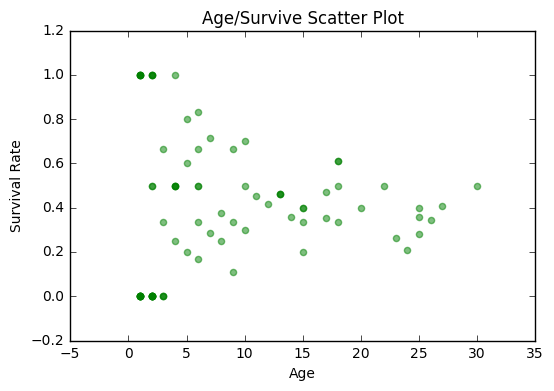

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = titanic_df.groupby('Age')['Survived'].count()
y = titanic_df.groupby('Age')['Survived'].mean()
#print len(x)
#print x
#print '-'*20
#print len(y)
#print y
plt.scatter(x, y,color='g', alpha=0.5)
plt.title("Age/Survive Scatter Plot")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.show()

To better understand the Titanic passengers,I did analysis of survial rate and age group. I already seperate the age into 8 groups ranging 0 to 80 and bin size is 10. It shows that young passengers with age between 0 to 10 has the highest survial rate, following by age group 30~40 and age group 50~60. I also did a Seaborn distrubtion plot which combined the information of age distrubtion and survival information. As the distrubtion shows, majority of passengers are between 20-40 age groups. Same as the bar chart, young passengers in age group 0-10 has the higest survival rate(eyeball the survive bar and did not survive bar). 

In [23]:
newDf=df_filtered.groupby('Age Group',as_index=False)['Survived'].mean()
newDf=newDf.rename(columns={'Survived':'Survival Rate'})
print newDf

  Age Group  Survival Rate
0      0~10       0.593750
1     10~20       0.382609
2     20~30       0.365217
3     30~40       0.445161
4     40~50       0.383721
5     50~60       0.404762
6     60~70       0.235294
7     70~80       0.200000


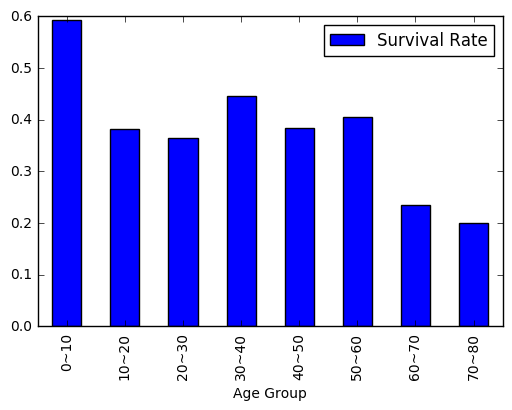

In [24]:
newDf.plot(x=newDf['Age Group'],kind='bar')
plt.show()

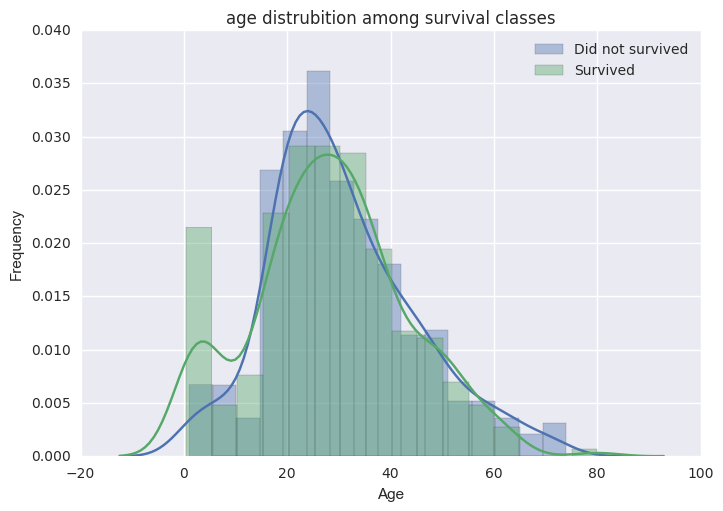

In [25]:
import numpy as np; 
import seaborn as sns;
import matplotlib.pyplot as plt;
sns.set(color_codes=True)
x1=titanic_df[titanic_df['Survived'] == 0]['Age'].dropna()
sns.distplot(x1,label='Did not survived')
x2=titanic_df[titanic_df['Survived'] == 1]['Age'].dropna()
ax=sns.distplot(x2,label='Survived')
#plt.hist(x1,color='g', bins=30)
#sns.barplot(x1)
ax.set(xlabel='Age', ylabel='Frequency')
plt.title('age distrubition among survival classes')
plt.legend()
plt.show()

## Sex and Pclass - Combined Effect ##

We know that passengers in 1st class have higher chance of survival than 3rd class and female have higher chance of survival than male. However, would a male passenger in the 1st class have a higher or lower chance of survival than a female passenger in the 3rd class? The bar chat below shows that 3rd class female have higher survival rate than 1st class male, but is that difference signaficant that we can apply to all population? I conducted the following experienment. 

H0: In population, male passengers in 1st class and female passengers in 3rd class have equal chance to survive ( H0: P1 = P2 ),
Ha: Population survival rate of female passengers in 3rd class is higher male passengers in 1st class ( Ha: P1 > P2 ) 
I conducted chi-squared test. 
t=-2.164
α=0.05
p=0.0004
 
We reject H0 because P<0.05. It means that female passengers in 3rd class have highr chance to survive than male passengers in 1st class. It reveals the fact that Sex has more effect on survival rate than Pclass.  

In [26]:
import scipy.stats
#rate_f = float(len(df_filtered[df_filtered['Sex']=='female']))/len(titanic_df[titanic_df['Sex']=='female'])
#rate_m = float(len(df_filtered[df_filtered['Sex']=='male']))/len(titanic_df[titanic_df['Sex']=='male'])
f_ob=[len(df_filtered[(df_filtered['Pclass']==1) &(df_filtered['Sex']=='male')& (df_filtered['Survived']==0)]),len(df_filtered[(df_filtered['Pclass']==3) & (df_filtered['Sex']=='female') & (df_filtered['Survived']==0)])]
f_exp=[len(df_filtered[(df_filtered['Pclass']==1)& (df_filtered['Sex']=='male')& (df_filtered['Survived']==1)]),len(df_filtered[(df_filtered['Pclass']==3) & (df_filtered['Sex']=='female') & (df_filtered['Survived']==1)])]
print f_ob
print f_exp
scipy.stats.chisquare(f_ob, f_exp)

[61, 55]
[40, 47]


Power_divergenceResult(statistic=12.386702127659575, pvalue=0.00043240228302499658)

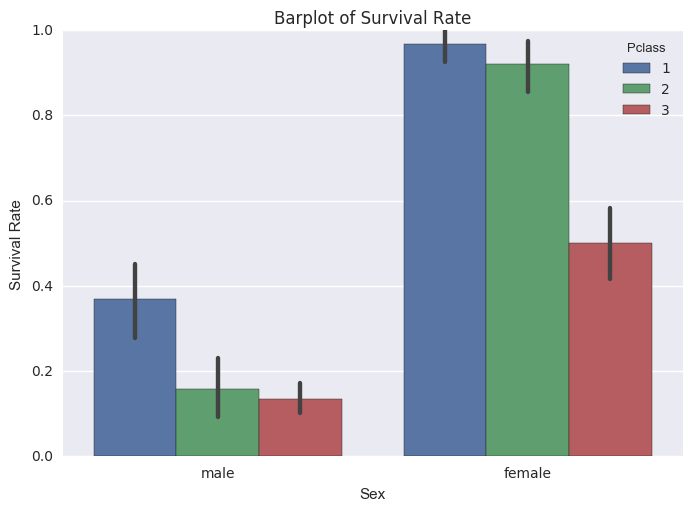

In [27]:
import numpy as np; 
import seaborn as sns;
import matplotlib.pyplot as plt;
sns.set(color_codes=True)
ax = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)
ax.set(xlabel='Sex',ylabel='Survival Rate')
plt.title('Barplot of Survival Rate')
plt.show()

# Summary


 ## Limitations ##
There are several limitations in our data analysis related to the dataset itself. 
*Missing Observation* The data only contains demographics and passenger information from 891 of the 2224 passengers in the ship.
*Missing Values* we have 177 records missing age information in our dataset. It might limit our analysis if the data is not missing at random. However, in our analysis, we assume the data is missing at random. 

I post three questions in last section. To Answer my questions, I utilized Python code, statistical test and plots. Following is my summary.
1. Do female passengers have better chance to survive than male passengers?
Yes. I conducted chi-square test and the statistics shows that female passengers have better chance to survive than male
2. Do Upper class passengers have better chance to survive than lower class passengers?
Yes. I conducted chi-square test and the statistics shows that 1st class passengers have better chance to survive than 2nd, and 2nd class passengers have better chance to survive than 3rd.
3. Is there a relation between Age and survival rate? 
No. The older the age doesn't guarantee higher survival rate or vise versa. However, Age group 0~10 has the highest survival rate of 61.3%.

Reference
1. http://matplotlib.org/
2. https://www.kaggle.com/c/titanic/data